In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from random import random
from random import seed

matplotlib.style.use('ggplot')
%matplotlib inline
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

# Data Forest

In [2]:
# importing training data from localhost path
path = r"C:\Users\Arshnoor\Desktop\DSA SEM02\8004_Data_Mining\Project\training.csv"
df1 = pd.read_csv(path)

# convert class categories into numberic code i.e. 0 to 3
df1['class'] = df1['class'].astype('category')
class_label = df1.filter(items = ['class'])
df1['class'] = class_label.apply(lambda x: x.cat.codes)

# select five features for train dataset
X = (df1.filter(items = ['b5', 'b6', 'b7', 'b8', 'b9']))
# select class labels for train dataset
Y = (df1.filter(items = ['class']))

# importing testing data from localhost path
path = r"C:\Users\Arshnoor\Desktop\DSA SEM02\8004_Data_Mining\Project\testing.csv"
df2 = pd.read_csv(path)

# convert class categories into numberic code i.e. 0 to 3
df2['class'] = df2['class'].astype('category')
class_label = df2.filter(items = ['class'])
df2['class'] = class_label.apply(lambda x: x.cat.codes)

X_test = df2.filter(items = ['b5', 'b6', 'b7', 'b8', 'b9'])

Y_test= df2.filter(items = ['class'])


mean of attribute_1:  58.73232323232323
median of attribute_1:  55.0
variance of attribute_1:  153.57773163103099


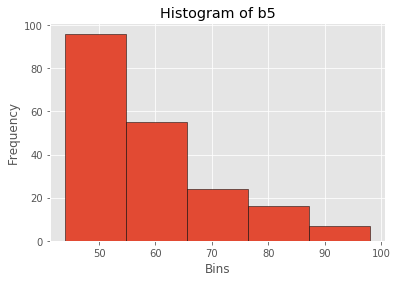

In [3]:
plt.hist(X['b5'], bins = 5, edgecolor = 'black')
print('mean of attribute_1: ', X['b5'].mean(axis =0)) 
print('median of attribute_1: ', X['b5'].median(axis =0))
print('variance of attribute_1: ', X['b5'].var(axis =0)) 
plt.title('Histogram of b5')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

mean of attribute_2:  100.65151515151516
median of attribute_2:  98.0
variance of attribute_2:  125.22311952007377


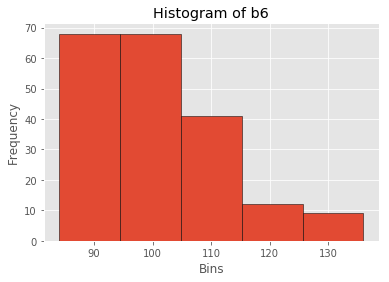

In [4]:
# feature 2
plt.hist(X['b6'], bins = 5, edgecolor = 'black')
print('mean of attribute_2: ', X['b6'].mean(axis =0)) 
print('median of attribute_2: ', X['b6'].median(axis =0))
print('variance of attribute_2: ', X['b6'].var(axis =0)) 
plt.title('Histogram of b6')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

mean of attribute_3:  90.6010101010101
median of attribute_3:  91.0
variance of attribute_3:  243.0125878070039


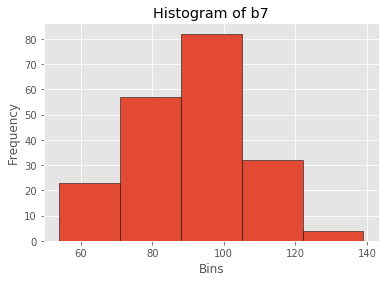

In [5]:
# feature 3
plt.hist(X['b7'], bins = 5, edgecolor = 'black')
print('mean of attribute_3: ',X['b7'].mean(axis =0)) 
print('median of attribute_3: ', X['b7'].median(axis =0))
print('variance of attribute_3: ', X['b7'].var(axis =0)) 
plt.title('Histogram of b7')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

mean of attribute_4:  28.69191919191919
median of attribute_4:  25.0
variance of attribute_4:  80.60003589191396


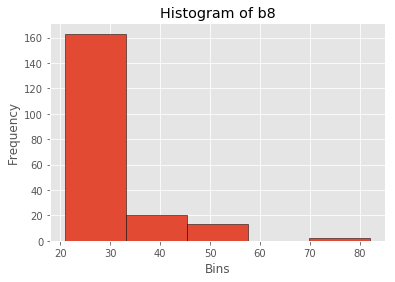

In [6]:
# feature 4
plt.hist(X['b8'], bins = 5, edgecolor = 'black')
print('mean of attribute_4: ', X['b8'].mean(axis =0)) 
print('median of attribute_4: ', X['b8'].median(axis =0))
print('variance of attribute_4: ', X['b8'].var(axis =0)) 
plt.title('Histogram of b8')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

mean of attribute_5: 61.11616161616162
median of attribute_5:  58.0
variance of attribute_5:  95.78846844075267


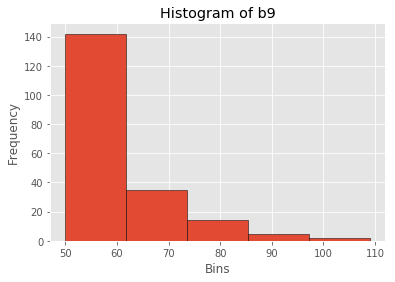

In [7]:
# feature 5
plt.hist(X['b9'], bins = 5, edgecolor = 'black')
print('mean of attribute_5:', X['b9'].mean(axis =0)) 
print('median of attribute_5: ', X['b9'].median(axis =0))
print('variance of attribute_5: ', X['b9'].var(axis =0)) 
plt.title('Histogram of b9')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

mean of class: 1.5101010101010102
median of class:  1.0
variance of class:  1.3983746090345073


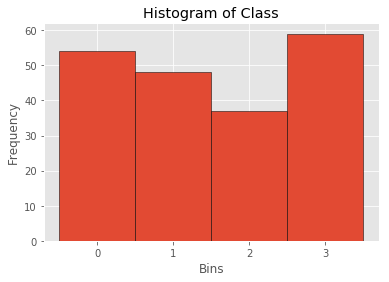

In [8]:
# class varibale
dist = Y['class'].value_counts()
plt.hist(Y, bins = [0,1,2,3,4], ec = 'black', align = 'left')
print('mean of class:', Y['class'].mean(axis =0)) 
print('median of class: ', Y['class'].median(axis =0))
print('variance of class: ',Y['class'].var(axis =0)) 
plt.title('Histogram of Class')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

In [9]:
# correlation matrix
cov_matrix = np.corrcoef(X.T)
pd.DataFrame(cov_matrix)

,0,1,2,3,4
0,1.000000,0.926318,0.204106,0.704936,0.661180
1,0.926318,1.000000,0.252331,0.734751,0.727810
2,0.204106,0.252331,1.000000,0.019066,0.162467
3,0.704936,0.734751,0.019066,1.000000,0.950395
4,0.661180,0.727810,0.162467,0.950395,1.000000


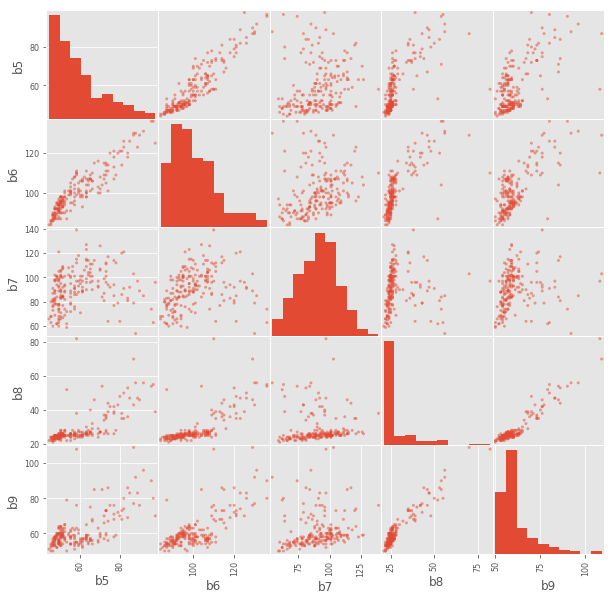

In [10]:
# Plotting the correlation matrix
data = X
scatter_matrix(data, figsize = (10,10))
plt.show()

# Logistic Discrimination for Forest Data

In [11]:
# Train logistic discriminant classifier using softmax

In [21]:
# selected features from dataset
X = (df1.filter(items = ['b5', 'b6', 'b7', 'b8', 'b9'])).as_matrix()
# select class labels for train dataset
Y = (df1.filter(items = ['class'])).as_matrix()

# K is the number of classes
K = len(np.unique(Y))

# bais vector intialized with zeros
b = np.zeros((1, K))

# intializing weight vector
W = np.random.uniform(-0.01, 0.01, size=(X.shape[1], K)) # [5,4]

# number of datapoints in the dataset
datapoints = X.shape[0]

# list to keep track of loss at each interation
lossHistory = []

# step-size for gradient descent
eta = 0.0001
num_iterations = 1000


def softmax(z): 
    # unnormalized probabilities
    exp_z = np.exp(z)
    exp_z_sum = np.sum(exp_z, axis = 1, keepdims = True)
    # normalized probabilities, all probabilities sum to one
    return exp_z/exp_z_sum

def cross_entropy(X, Y, n):
    softmax_output = X.T
    # we want to calculate the loss for probailities that are assigned to correct class
    correct_class_prob = -np.log(softmax_output[Y.T, range(n)])
    loss = np.sum(correct_class_prob)/n
    return loss
    
def gradient(softmax_output,Y,n):
    g_softmax = softmax_output.T
    # subtract 1 from the correct class for each datapoint
    g_softmax[Y.T, range(n)] -=1
    g_softmax = g_softmax/n
    return g_softmax
    
for i in range(num_iterations):   
    # calculate class score for linear classifier and add bais b
    z = np.dot(X,W) + b

    # calculate softmax output for each datapoint in each class
    softmax_output = softmax(z)

    # compute loss using cross entropy
    loss = cross_entropy(softmax_output, Y, datapoints)
    lossHistory.append(loss)
    if i%100 == 0:
        print('total loss at iteration ',i, 'is :', loss)
        
    # calcute gradient for loss function with respect to parameters
    # gradient of cross entropy loss function with softmax
    g_softmax = gradient(softmax_output,Y, datapoints)

    # update weight matrix W
    delta_W = np.dot(g_softmax, X)
    delta_W = (delta_W.T)
    W += -(eta)*delta_W

    # update bais matrix b
    delta_b = np.sum(delta_W, axis = 0, keepdims = True)
    b += -(eta)*delta_b


total loss at iteration  0 is : 1.6232687251086746
total loss at iteration  100 is : 1.1291839065251483
total loss at iteration  200 is : 1.014247050557395
total loss at iteration  300 is : 0.9367704467687152
total loss at iteration  400 is : 0.8787243944208718
total loss at iteration  500 is : 0.8328441076138078
total loss at iteration  600 is : 0.7953682885475934
total loss at iteration  700 is : 0.7640418743453489
total loss at iteration  800 is : 0.7373885555573657
total loss at iteration  900 is : 0.7143854838386926


Text(0.5,1,'Decrease in loss over 1000 iterations')

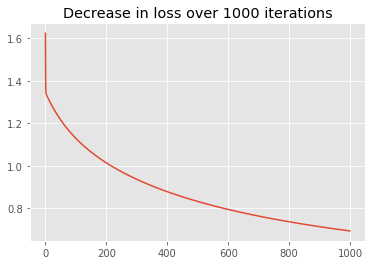

In [22]:
# plotting the loss 
plt.plot(range(1000), lossHistory)
plt.title("Decrease in loss over 1000 iterations")

Calculate the accuracy of discriminant 

In [15]:
# class_prediction with trained Weight matrix and bais b 
z = np.dot(X,W) + b
softmax_pred_class = np.argmax(z, axis = 1)
accuracy = np.mean(np.equal(softmax_pred_class, Y))
print("Accuracy for training datatset is : %2f " % (accuracy*100), '%')

Accuracy for training datatset is : 26.035609  %


Test the logistic discriminant on test data_set

In [16]:
X_test = df2.filter(items = ['b5', 'b6', 'b7', 'b8', 'b9']).as_matrix()
Y_test= df2.filter(items = ['class']).as_matrix()

In [17]:
z = np.dot(X_test,W) + b
softmax_pred_class = np.argmax(z, axis = 1)
accuracy = np.mean(np.equal(softmax_pred_class, Y_test))
print("Accuracy for testing dataset is : %2f " % (accuracy*100), '%')

Accuracy for testing dataset is : 31.094911  %


# Training a Multilayer Perceptron

In [20]:
# number of input layer
N_input = X.shape[1]

# number of hidden layer
N_hidden = 100

# number of output layer
N_output = len(np.unique(Y))

# weight matrix from input to hidden layer
W1 = np.random.uniform(-0.01, 0.01,size=(N_input, N_hidden))

# bias vector from input to hidden layer
b1 = np.zeros((1, N_hidden))

# weight matrix from hidden to output layer
W2 = np.random.uniform(-0.01, 0.01 ,size= (N_hidden, N_output))

# bias matrix from hidden to output layer
b2 = np.zeros((1, N_output))

# list to keep track of loss at each iteration
lossHistoryMLP = []
step_size = 0.008
num_iterations = 10000


def sigmoid_func(x):
    return 1.0/(1+np.exp(-x))

def softmax(z): 
    # unnormalized probabilities
    exp_z = np.exp(z)
     # normalized probabilities, all probabilities sum to one
    exp_z_sum = np.sum(exp_z, axis = 1, keepdims = True)
    return exp_z/exp_z_sum

def cross_entropy(X, Y, n):
    softmax_output = X.T
    # we want to calculate the loss for probailities that are assigned to correct class
    correct_class_prob = -np.log(softmax_output[Y.T, range(n)])
    loss = np.sum(correct_class_prob)/n
    return loss
    
def gradient(softmax_output,Y,n):
    g_softmax = softmax_output.T
    # subtract 1 from the correct class for each datapoint
    g_softmax[Y.T, range(n)] -=1
    g_softmax = g_softmax/n
    return g_softmax

for i in range(num_iterations):
    ## forward propagate
    # hidden layer output
    H_output = sigmoid_func(np.dot(X,W1) + b1) 
    z = np.dot(H_output, W2) + b2
    # softmax layer output
    softmax_output = softmax(z)

    # compute loss with cross entropy
    loss = cross_entropy(softmax_output, Y, datapoints)

    lossHistoryMLP.append(loss)
    if i%1000 == 0:
        print('total loss at iteration ',i, 'is :', loss)

    # gardient of cross entropy with softmax
    g_softmax = gradient(softmax_output,Y, datapoints)

    # backward propagation
    delta_W2 = np.dot(H_output.T, g_softmax.T)
   
    delta_b2 = np.sum(g_softmax, axis = 1, keepdims = True)
    delta_b2 = delta_b2.T
    
    # gradient of hidden layer
    delta_hidden = np.dot(g_softmax.T, W2.T)
    
    # gradient of softmax 
    g_sigmoid = H_output * (1- H_output)
    
    # calculate delta w1 
    delta_W1 = np.dot(X.T, delta_hidden * g_sigmoid)
   
    # calculate delta b1
    delta_b1 = np.sum(delta_hidden * g_sigmoid, axis =0, keepdims = True)
    
    # update all parameters
    W1 += -step_size * delta_W1
    b1 += -step_size * delta_b1
    W2 += -step_size * delta_W2
    b2 += -step_size * delta_b2


total loss at iteration  0 is : 1.3887958069935997
total loss at iteration  1000 is : 0.5563001528300103
total loss at iteration  2000 is : 0.35455333222779356
total loss at iteration  3000 is : 0.3095154382050094
total loss at iteration  4000 is : 0.2870018335470063
total loss at iteration  5000 is : 0.27362132591511
total loss at iteration  6000 is : 0.2643506667164429
total loss at iteration  7000 is : 0.2573706934513272
total loss at iteration  8000 is : 0.25174313722404484
total loss at iteration  9000 is : 0.246796249600077


Text(0.5,1,'Loss over 10000 iterations')

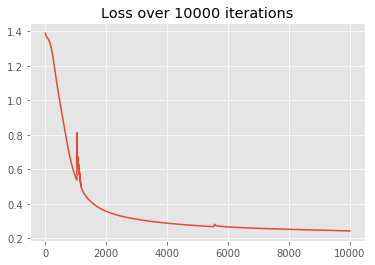

In [19]:
# plotting the loss 

plt.plot(range(10000), lossHistoryMLP)
plt.title("Loss over 10000 iterations")

In [25]:
# accuracy with the training dataset
H_output = sigmoid_func(np.dot(X, W1) + b1)
z = np.dot(H_output, W2) + b2
softmax_pred_output = np.argmax(z, axis=1)
Accuracy = np.mean(softmax_pred_output == Y)
print("Accuracy for training datatset is : %2f " % (Accuracy*100), '%')

Accuracy for training datatset is : 25.752474  %


Test MLP with testing dataset

In [21]:
# accuracy with test dataset
H_output = sigmoid_func(np.dot(X_test, W1) + b1)
z = np.dot(H_output, W2) + b2
softmax_pred_output = np.argmax(z, axis=1)
Accuracy = np.mean(softmax_pred_output == Y_test)
print("Accuracy for training datatset is : %2f " % (Accuracy*100), '%')

Accuracy for training datatset is : 30.068639  %
